In [275]:
#first we run cellpose and outlines_list to get x,ys from cellpose
# second we run x_y_to_outlines to get x,ys from VGG-JSON 
# if the two arrays are identical, we know the transformation works --> cellpose, outlines_list part can be deleted.


import numpy as np
import pandas as pd
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import cellpose
from cellpose import utils, io, models, plot
from cellpose.utils import outlines_list, masks_to_outlines
import os, sys
import glob
import cv2
from shapely.geometry import Polygon
import torch
import importlib
importlib.reload(models)
import csv
from pathlib import Path
import json
from collections import Counter

currentdir = os.path.dirname(os.path.realpath('vgg_to_cellpose.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

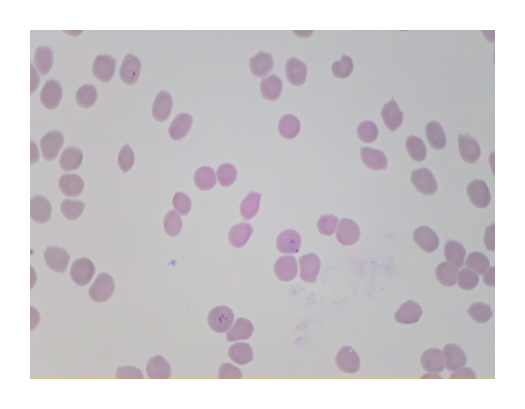

In [276]:
# cralws folder for files ending with .jpeg

def get_jpeg(path):
    list_jpeg = []
    # Delimiter
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".jpeg"):
                jpeg_path = os.path.join(root, file)
                list_jpeg.append(jpeg_path)
    return list_jpeg

org_files = get_jpeg('../data/scan_clean/vgg_test')
org_files

# view 1 image
img = io.imread(org_files[0])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [204]:
imgs = [cv2.imread(img_path) for img_path in org_files]

In [5]:
masks_all = []
img_len = len(imgs)
model = models.Cellpose(gpu=True, model_type='cyto')
chan = [0, 0] # for black and white imgs
diameter = 170

for i in range(img_len):
    masks, flows, styles, diams = model.eval(imgs[i], 
                                diameter= diameter, 
                                channels=chan,
                                invert = True,
                                flow_threshold = 1)
    masks_all.append(masks)

TORCH CUDA version not installed/working.
>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
time spent: running network 126.10s; flow+mask computation 3.88
estimated masks for 1 image(s) in 131.34 sec
>>>> TOTAL TIME 131.36 sec
processing 1 image(s)
time spent: running network 59.72s; flow+mask computation 2.71
estimated masks for 1 image(s) in 63.69 sec
>>>> TOTAL TIME 63.70 sec
processing 1 image(s)
time spent: running network 68.57s; flow+mask computation 2.70
estimated masks for 1 image(s) in 72.22 sec
>>>> TOTAL TIME 72.22 sec
processing 1 image(s)
time spent: running network 66.93s; flow+mask computation 2.84
estimated masks for 1 image(s) in 70.58 sec
>>>> TOTAL TIME 70.58 sec


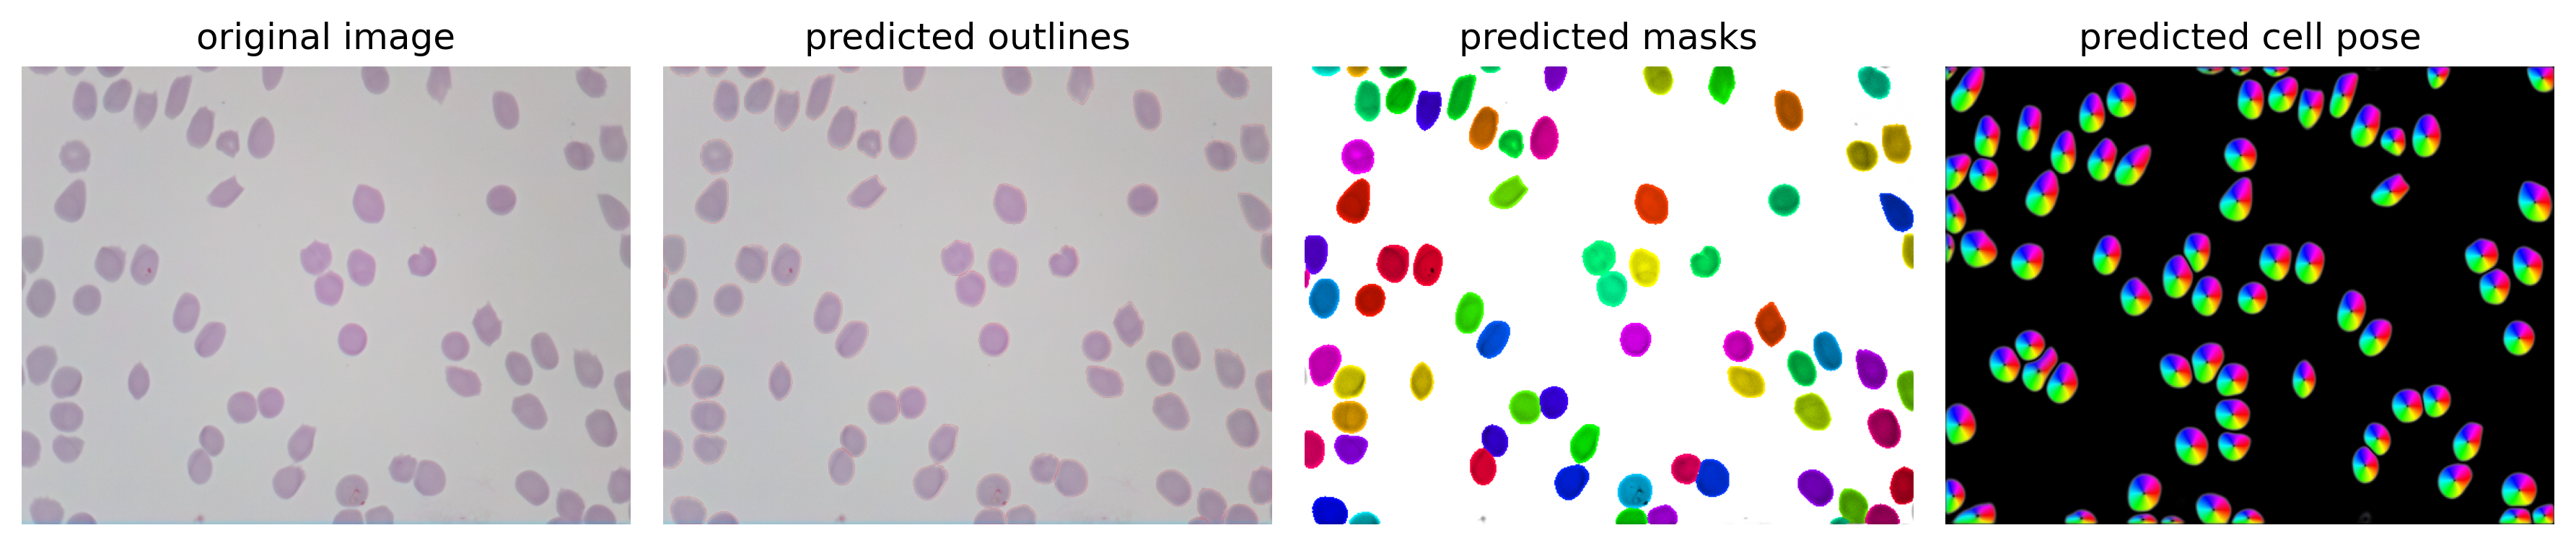

In [205]:
# quick test to check if for loop works and masks are correct

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, imgs[1], masks_all[1], flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [206]:
#get outlines of first polygon of first image
outlines_0 = outlines_list(masks_all[0])
outlines_1 = outlines_list(masks_all[1])
outlines_2 = outlines_list(masks_all[2])
outlines_3 = outlines_list(masks_all[3])

In [8]:
#read json
with open('../data/vgg_annotations/poly_annotations.json') as file:
    json_vgg_poly = json.load(file)

In [277]:
#function x_y_to_outlines returns x,ys of all images and polygons in a list of lists of [x,y]
def x_y_to_outlines(json_vgg_poly):
    img_len = len(list(json_vgg_poly.keys()))
    img_arr = []
    for img in range(img_len): #img = 0-3
        first_key = list(json_vgg_poly.keys())[img]
        poly_len = len(json_vgg_poly[first_key]['regions'])
        for poly in range(poly_len): # in case of img = 0, poly = 0-68
            poly_arr = []
            point_len = len(json_vgg_poly[first_key]['regions'][poly]['shape_attributes']['all_points_x'])
            for point in range(point_len): # in case of poly = 0, point = 0 - 404
                x_y_arr = []
                x_y_arr.append(json_vgg_poly[first_key]['regions'][poly]['shape_attributes']['all_points_x'][point])
                x_y_arr.append(json_vgg_poly[first_key]['regions'][poly]['shape_attributes']['all_points_y'][point])
                poly_arr.append(x_y_arr)
            img_arr.append(np.asarray(poly_arr))
    return img_arr

In [278]:
#call function x_y_to_outlines and display first list. --> should return the same list as outlines_0[0]
list_vgg_0 = x_y_to_outlines(json_vgg_poly)[0] #1st poly of 1st img
list_vgg_1 = x_y_to_outlines(json_vgg_poly)[1] #2nd poly of 1st img
list_vgg_2 = x_y_to_outlines(json_vgg_poly)[2]
list_vgg_3 = x_y_to_outlines(json_vgg_poly)[3]

In [273]:
#display outlines of first polygon of first image. --> should return the same list as x_y_to_outlines(json_vgg_poly)[0]
list_cellpose_0 = outlines_0[0] # 1st poly of 1st img
list_cellpose_1 = outlines_0[1] # 2nd poly of 1st img
list_cellpose_2 = outlines_0[2]
list_cellpose_3 = outlines_0[3]

In [279]:
list_vgg_2

array([[3190,    0],
       [3190,    1],
       [3190,    2],
       [3190,    3],
       [3190,    4],
       [3190,    5],
       [3189,    6],
       [3188,    6],
       [3187,    6],
       [3186,    6],
       [3185,    6],
       [3184,    6],
       [3183,    6],
       [3182,    6],
       [3181,    6],
       [3180,    6],
       [3179,    6],
       [3178,    6],
       [3178,    7],
       [3178,    8],
       [3178,    9],
       [3178,   10],
       [3178,   11],
       [3178,   12],
       [3178,   13],
       [3178,   14],
       [3178,   15],
       [3178,   16],
       [3178,   17],
       [3179,   17],
       [3180,   17],
       [3181,   17],
       [3182,   17],
       [3183,   17],
       [3184,   18],
       [3184,   19],
       [3184,   20],
       [3184,   21],
       [3184,   22],
       [3184,   23],
       [3184,   24],
       [3184,   25],
       [3184,   26],
       [3184,   27],
       [3184,   28],
       [3184,   29],
       [3184,   30],
       [3184,

In [280]:
list_cellpose_2

array([[3190,    0],
       [3190,    1],
       [3190,    2],
       [3190,    3],
       [3190,    4],
       [3190,    5],
       [3189,    6],
       [3188,    6],
       [3187,    6],
       [3186,    6],
       [3185,    6],
       [3184,    6],
       [3183,    6],
       [3182,    6],
       [3181,    6],
       [3180,    6],
       [3179,    6],
       [3178,    6],
       [3178,    7],
       [3178,    8],
       [3178,    9],
       [3178,   10],
       [3178,   11],
       [3178,   12],
       [3178,   13],
       [3178,   14],
       [3178,   15],
       [3178,   16],
       [3178,   17],
       [3179,   17],
       [3180,   17],
       [3181,   17],
       [3182,   17],
       [3183,   17],
       [3184,   18],
       [3184,   19],
       [3184,   20],
       [3184,   21],
       [3184,   22],
       [3184,   23],
       [3184,   24],
       [3184,   25],
       [3184,   26],
       [3184,   27],
       [3184,   28],
       [3184,   29],
       [3184,   30],
       [3184,

In [226]:
len(list_cellpose_1)

394

In [225]:
len(list_vgg_1)

436

In [260]:
# true for first img and poly but not for following...
np.array_equal(np.asarray(list_vgg_3), list_cellpose_3)

True

In [196]:
len(x_y_to_outlines(json_vgg_poly)[0])

404

In [151]:
len(outlines_1)

71

In [162]:
outlines_all = []
outlines_all.append(outlines_0)
outlines_all.append(outlines_1)
outlines_all.append(outlines_2)
outlines_all.append(outlines_3)

In [163]:
len(outlines_all)

4

In [240]:
list_vgg_1

array([[1850,    0],
       [1850,    1],
       [1850,    2],
       [1850,    3],
       [1850,    4],
       [1850,    5],
       [1849,    6],
       [1848,    6],
       [1847,    6],
       [1846,    6],
       [1845,    6],
       [1845,    7],
       [1845,    8],
       [1845,    9],
       [1845,   10],
       [1845,   11],
       [1846,   11],
       [1847,   11],
       [1848,   11],
       [1849,   11],
       [1850,   12],
       [1850,   13],
       [1850,   14],
       [1850,   15],
       [1850,   16],
       [1850,   17],
       [1850,   18],
       [1850,   19],
       [1850,   20],
       [1850,   21],
       [1850,   22],
       [1851,   22],
       [1852,   22],
       [1853,   22],
       [1854,   22],
       [1855,   22],
       [1856,   23],
       [1856,   24],
       [1856,   25],
       [1856,   26],
       [1856,   27],
       [1856,   28],
       [1857,   28],
       [1858,   28],
       [1859,   28],
       [1860,   28],
       [1861,   28],
       [1862,

In [239]:
outlines_0

[array([[227,   0],
        [227,   1],
        [227,   2],
        [227,   3],
        [227,   4],
        [227,   5],
        [227,   6],
        [227,   7],
        [227,   8],
        [227,   9],
        [227,  10],
        [227,  11],
        [227,  12],
        [227,  13],
        [227,  14],
        [227,  15],
        [227,  16],
        [227,  17],
        [228,  17],
        [229,  17],
        [230,  17],
        [231,  17],
        [232,  17],
        [233,  18],
        [233,  19],
        [233,  20],
        [233,  21],
        [233,  22],
        [234,  22],
        [235,  22],
        [236,  22],
        [237,  22],
        [238,  22],
        [239,  23],
        [239,  24],
        [239,  25],
        [239,  26],
        [239,  27],
        [239,  28],
        [240,  28],
        [241,  28],
        [242,  28],
        [243,  28],
        [244,  28],
        [245,  29],
        [245,  30],
        [245,  31],
        [245,  32],
        [245,  33],
        [245,  34],


In [248]:
first_key = list(json_vgg_poly.keys())[3]
len(json_vgg_poly[first_key]['regions'])

75

In [267]:
len(x_y_to_outlines(json_vgg_poly))

4

In [274]:
x_y_to_outlines(json_vgg_poly)

array([[227,   0],
       [227,   1],
       [227,   2],
       [227,   3],
       [227,   4],
       [227,   5],
       [227,   6],
       [227,   7],
       [227,   8],
       [227,   9],
       [227,  10],
       [227,  11],
       [227,  12],
       [227,  13],
       [227,  14],
       [227,  15],
       [227,  16],
       [227,  17],
       [228,  17],
       [229,  17],
       [230,  17],
       [231,  17],
       [232,  17],
       [233,  18],
       [233,  19],
       [233,  20],
       [233,  21],
       [233,  22],
       [234,  22],
       [235,  22],
       [236,  22],
       [237,  22],
       [238,  22],
       [239,  23],
       [239,  24],
       [239,  25],
       [239,  26],
       [239,  27],
       [239,  28],
       [240,  28],
       [241,  28],
       [242,  28],
       [243,  28],
       [244,  28],
       [245,  29],
       [245,  30],
       [245,  31],
       [245,  32],
       [245,  33],
       [245,  34],
       [246,  34],
       [247,  34],
       [248,